<a href="https://colab.research.google.com/github/MFBS2005/gomycode/blob/main/checkpoint5_dsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
x=pd.read_csv("/content/drive/My Drive/titanic-passengers.csv",sep=";")
x.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [86]:
x.info()
x.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
print(x.isnull().sum())
#x["Cabin"].value_counts()
#x["Cabin"].fillna("B98",inplace=True)
#its better to drop the columns
x.drop(["Cabin"],axis=1,inplace=True)
x["Embarked"].value_counts()
x["Embarked"].fillna("S",inplace=True)
x["Age"].fillna(x["Age"].mean(),inplace=True)
x.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [88]:
print(x.isnull().sum().sum())

0


In [89]:
x.info()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
l1=["Survived","Embarked","Sex"]
for i in l1:
  x[i]=encoder.fit_transform(x[i])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

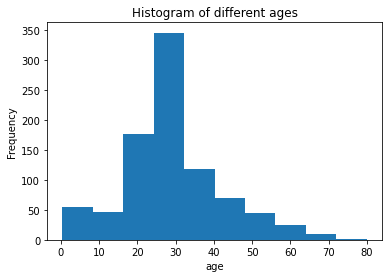

In [90]:
import matplotlib.pyplot as plt
plt.title("Histogram of different ages")
plt.xlabel("age")
x["Age"].plot.hist()

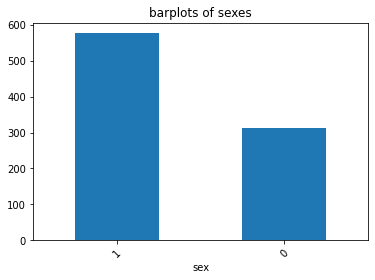

In [91]:
plt.title("barplots of sexes")
plt.xlabel("sex")
plt.ylabel("")
rr=x["Sex"].value_counts()
rr.plot.bar(rot=45)

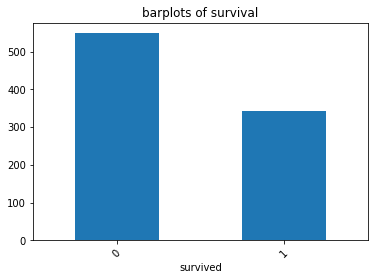

In [92]:
plt.title("barplots of survival")
plt.xlabel("survived")
plt.ylabel("")
rr=x["Survived"].value_counts()
rr.plot.bar(rot=45)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


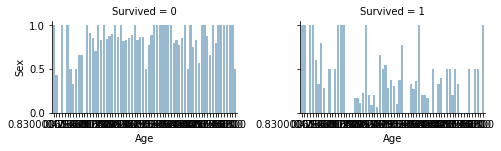

In [93]:
import seaborn as sns
grid=sns.FacetGrid(x,col="Survived",height=2.2,aspect=1.6)
grid.map(sns.barplot,"Age","Sex",ci=None,alpha=.5)

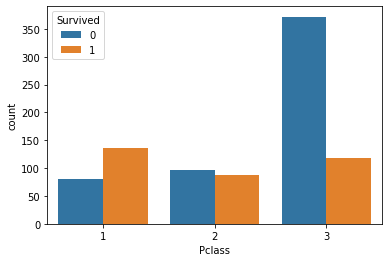

In [94]:
import seaborn as sns
nn=sns.countplot(x="Pclass",hue="Survived",data=x)

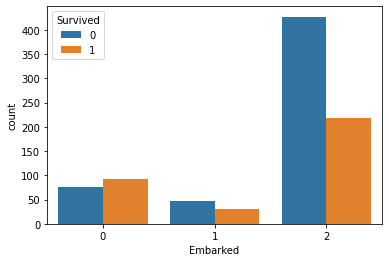

In [95]:
import seaborn as sns
nn=sns.countplot(x="Embarked",hue="Survived",data=x)

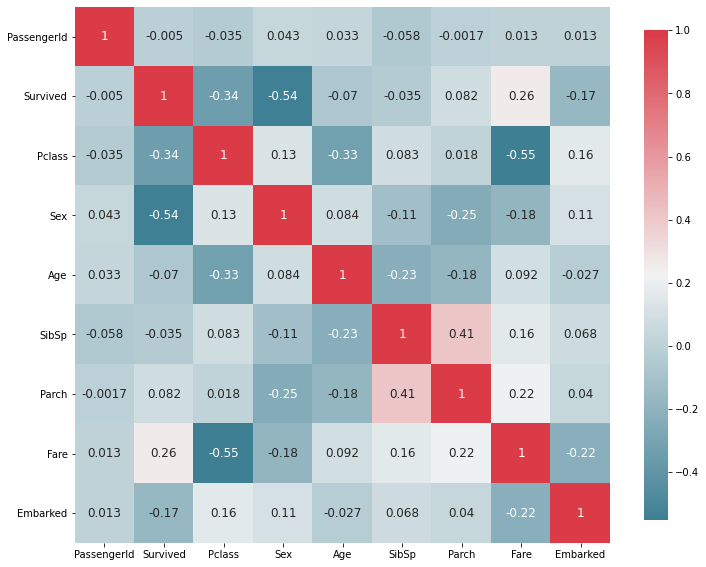

In [96]:
import seaborn as sns
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(x)
#the biggest positive correlation:between Parch and sibSp
#the biggest negative correlation:between Pclass and Fare


In [97]:
x[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [98]:
import re
def gettitle(name):
  title=re.findall(r"\b[A-Z][a-z]+\.",name)
  return title[0]
x["Title"]=x["Name"].apply(gettitle)
x["Title"].head()

0     Mr.
1     Mr.
2     Mr.
3    Mrs.
4     Mr.
Name: Title, dtype: object

In [99]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mr.
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mr.
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mr.
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs.
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mr.


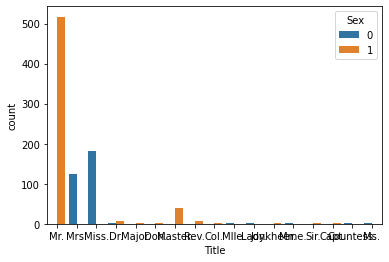

In [100]:
import seaborn as sns
nn=sns.countplot(x="Title",hue="Sex",data=x)

In [101]:
title_Dictionary = { "Capt.":       "Officer",

                    "Col.":        "Officer",

                    "Major.":      "Officer",

                      "Dr.":         "Officer",

                    "Rev.":        "Officer" ,

                    "Jonkheer.":   "Royalty",

                    "Don.":        "Royalty",

                    "Sir." :       "Royalty",

                   "Lady." :      "Royalty",

                  "Countess.": "Royalty",

                    "Dona.":       "Royalty",

                    "Mme.":        "Miss",

                    "Mlle.":       "Miss",

                    "Miss." :      "Miss",

                    "Ms.":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs." :       "Mrs",

                    "Master." :    "Master" }
x["Title"].replace(title_Dictionary,inplace=True)
x["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

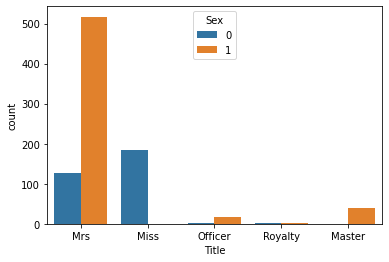

In [102]:
import seaborn as sns
nn=sns.countplot(x="Title",hue="Sex",data=x)

In [103]:
x["FamilySize"]=x["Parch"]+x["SibSp"]
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mrs,1


In [104]:
x[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [105]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mrs,1


In [106]:
x["Title"]=encoder.fit_transform(x["Title"])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 90.6+ KB


Accuracy=0.84
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       144
           1       0.80      0.72      0.76        79

    accuracy                           0.84       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



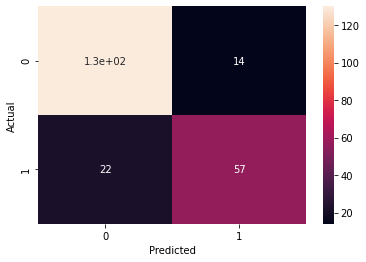

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
xx= x[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare','Embarked']]
y= x['Survived']
xx_train,xx_test,y_train,y_test = train_test_split(xx,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   
logreg.fit(xx_train, y_train) 
y_pred  = logreg.predict(xx_test) 
print("Accuracy={:.2f}".format(logreg.score(xx_test, y_test)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

roc_auc_score for Logistic Regression:  0.8479254571026723


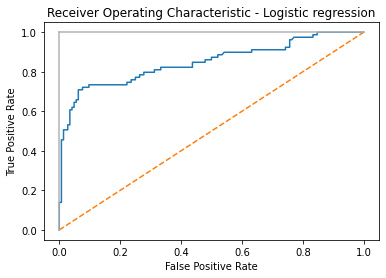

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = logreg.predict_proba(xx_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
